In [1]:
import pandas as pd
import numpy as np
#Collection of text Document into matrix of token count
from sklearn.feature_extraction.text import CountVectorizer

#import different ML classifiers
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

#import ML evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics, model_selection

#import scikitplot to plot confusion matrix
#import scikitplot as skplt


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/website-data/master/dataset.csv")
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [3]:
data.info()    #dataset do not contain any null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [4]:
data.isnull().sum()           # returns the number of missing values in the data set.

Text        0
language    0
dtype: int64

In [5]:
data["language"].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [6]:
x = data["Text"]
y = data["language"]

In [7]:
data=x
target=y

In [8]:
CV = CountVectorizer() #CountVectorizer
X = CV.fit_transform(x)
X

<22000x277720 sparse matrix of type '<class 'numpy.int64'>'
	with 913598 stored elements in Compressed Sparse Row format>

In [9]:
#Split Train Test function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [10]:

#select a classifier
# model = GaussianNB()
# model = BernoulliNB()
model = MultinomialNB()

#other ML classifiers
# model = SVC()
# model=LinearSVC()
# model=LogisticRegression()
# model = RandomForestClassifier()
# model = DecisionTreeClassifier()
# model=MLPClassifier()        #most overfitting #accuracy 97
# model=KNeighborsClassifier(n_neighbors=4)




In [11]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.953168044077135

In [12]:
pred=model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[340   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0 159   0  25   0   2   0   0 119   0   1   0   0   0   3   0   3   2
    0   0   3   0]
 [  0   0 342   1   0   3   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0 333   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   1   8 325   1   0   1   0   0   0   0   0   0   0   2   0   0
    0   0   0   0]
 [  0   0   0   3   0 320   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0]
 [  0   0   0   7   0   0 334   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0  10   0   0   0 308   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  12   2  12   3   4   1   1 284   0   1   0   0   0   1   1   3   2
    0   0   1   0]
 [  0   0   0   2   0   0   0   0   6 317   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   1  22   0   5   0   1   1   0 314   0   0   0   0   0   2 

In [13]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       341
     Chinese       0.93      0.50      0.65       317
       Dutch       0.99      0.99      0.99       346
     English       0.70      1.00      0.82       333
    Estonian       0.99      0.96      0.97       338
      French       0.95      0.99      0.97       324
       Hindi       1.00      0.98      0.99       341
  Indonesian       0.99      0.97      0.98       318
    Japanese       0.69      0.87      0.77       328
      Korean       1.00      0.98      0.99       325
       Latin       0.99      0.91      0.95       346
     Persian       1.00      1.00      1.00       323
   Portugese       1.00      0.96      0.98       318
      Pushto       1.00      0.97      0.98       328
    Romanian       0.99      0.98      0.99       324
     Russian       0.99      0.99      0.99       332
     Spanish       0.97      0.99      0.98       322
     Swedish       0.99    

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

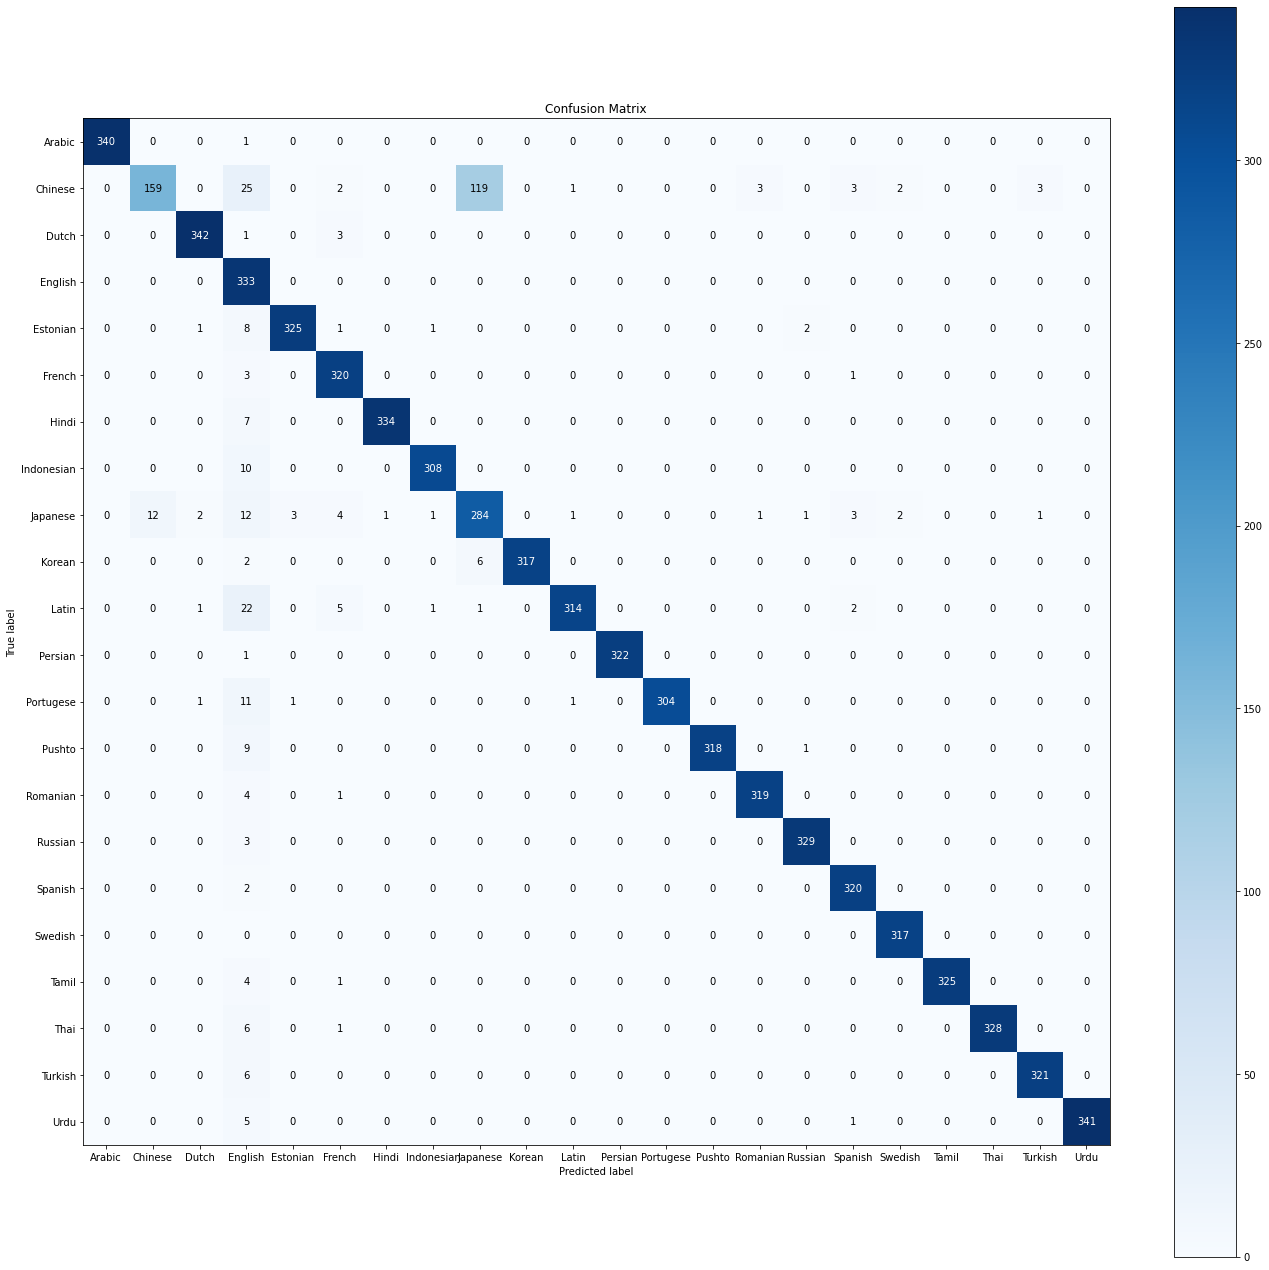

In [14]:
#draw confusion matrix using sci-kit plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix( y_test,pred, normalize=False, title="Confusion Matrix", cmap="Blues",figsize=(23,23))

In [15]:
#calcualte and print accuracy
model_acc = accuracy_score(y_test, pred)*100
print(str(model_acc))

95.31680440771349


In [16]:
# #calcualte and print accuracy
model_pre =  0.96*100
# print(model_pre)

In [17]:
user = ("Enter Text: ")
entered_data = CV.transform([user]).toarray()
output=model.predict(entered_data)
# print("This Language is ",output)

In [18]:
#GUI

from tkinter import *


root = Tk()

root.title("Language Prediction Project")
root.geometry("500x350")


# Define a function to return the Input data
def get_data():
    entered_data = CV.transform([entry.get()]).toarray()
    output=model.predict(entered_data)
    label.config(text= output, font= ('Helvetica 13'))

#Create an Entry Widget

mylable2=Label(root,text="Enter Your Language/Sentence Here", font=10,  height="2")
mylable2.pack()

entry = Entry(root, width=100, fg="green", font=10, cursor="arrow")
entry.pack()


# CV.transform([text]).toarray()

mybutton = Button(root, height="1", cursor="target", text="Result",command= get_data, bg="white", fg="blue", pady=3, padx=4, font=10)
mybutton.pack()



label= Label(root, text="Predicted Language will be shown here", font=('Helvetica 13'), height="4", fg="red")
label.pack()

label1 = Label(root, text="Acurracy of designed system is: "+str(model_acc), font=('Helvetica 13'), height="4", fg="green")
label1.pack()

label2 = Label(root, text="Pecision of designed system is: "+str(model_pre), font=('Helvetica 13'), fg="green")
label2.pack()


root.mainloop()